In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [16]:
Ts = np.vectorize(pd.Timestamp)

In [4]:
bt = pd.read_csv('data/breakup-times.csv')
bt.head()

,Year,Julian Date,Date Time
0,1917,120.4795,April 30 11:30 AM
1,1918,131.3983,May 11 9:33 AM
2,1919,123.6066,May 3 2:33 PM
3,1920,132.4490,May 11 10:46 AM
4,1921,131.2795,May 11 6:42 AM


In [24]:
# Clean columns
bt['Breakup'] = Ts(bt['Year'].astype(str) + " " + 
                   bt['Date Time'])
bt['Delta'] = bt['Breakup'] - Ts(bt['Year'].astype(str))
bt['Days'] = bt['Days'].astype('timedelta64[D]')
bt = bt[['Year', 'Breakup', 'Delta', 'Days']]

In [43]:
bt.head()

,Year,Breakup,Delta,Days
0,1917,1917-04-30 11:30:00,119 days 11:30:00,119
1,1918,1918-05-11 09:33:00,130 days 09:33:00,130
2,1919,1919-05-03 14:33:00,122 days 14:33:00,122
3,1920,1920-05-11 10:46:00,131 days 10:46:00,131
4,1921,1921-05-11 06:42:00,130 days 06:42:00,130


In [44]:
# Load ONI values
oni = pd.read_csv('data/oni-values.tsv', 
                  sep='\t')
oni = oni[['Year2', 'Type', 'JFM']]

In [45]:
oni.head().T

,0,1,2,3,4
Year2,1951,1952,1953,1954,1955
Type,WL,WE*,WE,WE,WL
JFM,-0.6,0.4,0.6,0.4,-0.6


In [84]:
day_o = pd.DataFrame({'oni_jfm': oni.JFM[:-1].values,
                      'days': bt.Days[bt.Year>1950].values})

day_o.head()

,days,oni_jfm
1951,119,-0.6
1952,132,0.4
1953,118,0.6
1954,125,0.4
1955,128,-0.6


In [85]:
ss = StandardScaler()

In [94]:
day_o = pd.DataFrame(ss.fit_transform(day_o),
                    index=range(1951, 2016),
                    columns=['days', 'oni'])

In [95]:
day_o.head()

,days,oni
1951,-0.355306,-0.737876
1952,1.497987,0.520968
1953,-0.497867,0.772736
1954,0.500060,0.520968
1955,0.927743,-0.737876


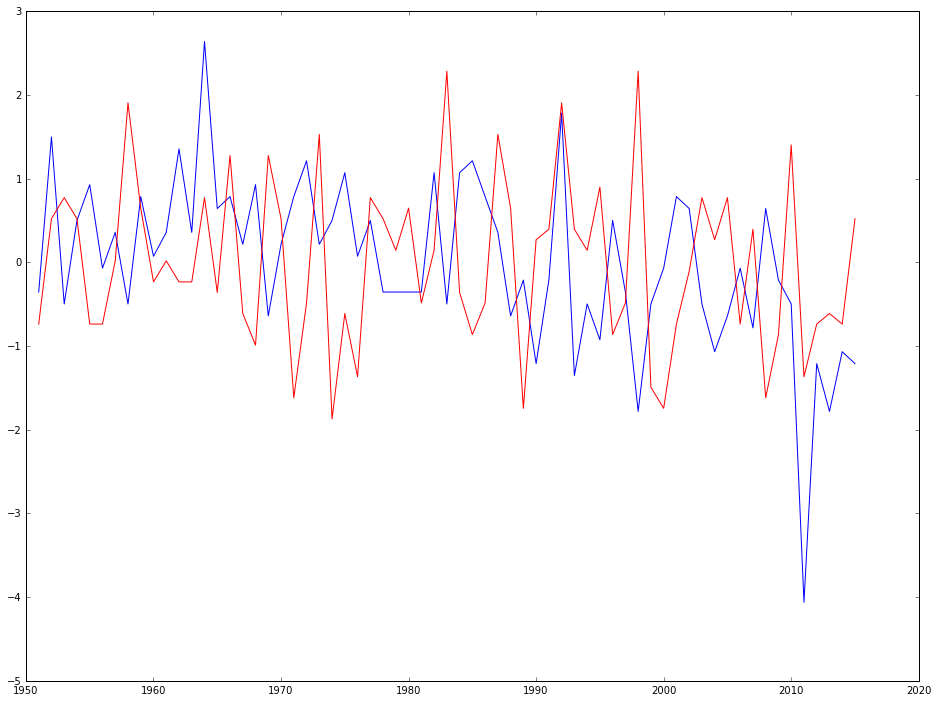

In [103]:
plt.figure(figsize=(16, 12))
plt.plot(day_o.days, c='blue')
plt.plot(day_o.oni, c='red')